In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Yapılan işlemlerin özeti:
#### 1.Web scraping yapıldı (Hurriyet Emlak Scraper dosyası ile)  ve 14 farklı tablodan toplam 8215 ev bilgisi detaylı bir şekilde çekildi
#### 2.Veri temizlemesi yapıldı
#### 3.Regression işlemi uygulandı
#### 4.Deep Learning işlemi de yapılarak Regression ile karşılaştırma yapıldı
#### 5.İlan başlığında en çok kullanılan kelimeler wordcloud ile ekrana yansıtıldı

In [2]:
# Siteden çok veri çekildiği için site sunucusu boot olarak algıladı ve status code 429 hatası alınmasın diye veriler
# 14 farklı tablo ile çekildi
#df1=pd.read_csv("hurriyetEmlak1.csv").drop(["Unnamed: 0"],axis=1)
#df2=pd.read_csv("hurriyetEmlak2.csv").drop(["Unnamed: 0"],axis=1)
#df3=pd.read_csv("hurriyetEmlak3.csv").drop(["Unnamed: 0"],axis=1)
#df4=pd.read_csv("hurriyetEmlak4.csv").drop(["Unnamed: 0"],axis=1)
#df5=pd.read_csv("hurriyetEmlak5.csv").drop(["Unnamed: 0"],axis=1)
#df6=pd.read_csv("hurriyetEmlak6.csv").drop(["Unnamed: 0"],axis=1)
#df7=pd.read_csv("hurriyetEmlak7.csv").drop(["Unnamed: 0"],axis=1)
#df8=pd.read_csv("hurriyetEmlak8.csv").drop(["Unnamed: 0"],axis=1)
#df9=pd.read_csv("hurriyetEmlak9.csv").drop(["Unnamed: 0"],axis=1)
#df10=pd.read_csv("hurriyetEmlak10.csv").drop(["Unnamed: 0"],axis=1)
#df11=pd.read_csv("hurriyetEmlak11.csv").drop(["Unnamed: 0"],axis=1)
#df12=pd.read_csv("hurriyetEmlak12.csv").drop(["Unnamed: 0"],axis=1)
#df13=pd.read_csv("hurriyetEmlak13.csv").drop(["Unnamed: 0"],axis=1)
#df14=pd.read_csv("hurriyetEmlak14.csv").drop(["Unnamed: 0"],axis=1)

#total_list=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14],ignore_index=True)
#total_list.to_csv("ankara_satilik_hurriyet_emlak.csv")

In [3]:
df=pd.read_csv("ankara_satilik_hurriyet_emlak.csv").drop(["Unnamed: 0"],axis=1)

In [4]:
df.head()

,listing_id,price,city,district,neighborhood,last_edit,listing_status,housing_type,number_of_rooms,area,...,building_status,usage_status,deed,dues,swap,facade,fuel_type,inside_the_site,rental_income,title
0,92647-2080,989.000 TL,Ankara,Etimesgut,Bağlıca,Bugün,Satılık,Daire,4 + 1,200 m2,...,İkinci El,Ev Sahibi Oturuyor,Kat Mülkiyeti,None,Evet,"Kuzey,",Doğalgaz,Evet (Site Adı Belirtilmemiş),"3,000 TL",Bağlıca Satılık 4+1 Kapalı Otopark Yüzme Havuz...
1,92647-1983,949.000 TL,Ankara,Etimesgut,Bağlıca,Bugün,Satılık,Daire,4 + 1,200 m2,...,Sıfır,Boş,Kat Mülkiyeti,None,Evet,"Kuzey,",Doğalgaz,Evet (Site Adı Belirtilmemiş),"3,000 TL","Bağlıca Satılık 4,5+1 Ara Katta Daire Seçenekl..."
2,92647-2092,995.000 TL,Ankara,Etimesgut,Bağlıca,Bugün,Satılık,Daire,4 + 1,190 m2,...,İkinci El,Ev Sahibi Oturuyor,Kat Mülkiyeti,250 TL,Hayır,"Kuzey,",Doğalgaz,Evet (Site Adı Belirtilmemiş),"3,250 TL",EMLAK KÜPÜNDE MERKEZDE CADDE ÜZERİNDE SÜPER LÜ...
3,2545-5601,369.000 TL,Ankara,Pursaklar,Merkez,Bugün,Satılık,Daire,3 + 1,125 m2,...,İkinci El,Boş,Kat Mülkiyeti,None,Evet,"Güney,",Doğalgaz,None,"1,000 TL",ERTEKİN EMLAK'TAN PAZARTESİ PAZARI YAK GÜNEY C...
4,116336-464,730.000 TL,Ankara,Yenimahalle,Turgut Özal,Bugün,Satılık,Daire,3 + 1,155 m2,...,İkinci El,Ev Sahibi Oturuyor,Kat Mülkiyeti,330 TL,Hayır,"Güney,",Doğalgaz,Evet (Site Adı Belirtilmemiş),"2,500 TL",EMLAK GEZGİNİ ACİL EŞYALI SATILIK! SÜPERLÜX 3+...


In [5]:
df.tail()

,listing_id,price,city,district,neighborhood,last_edit,listing_status,housing_type,number_of_rooms,area,...,building_status,usage_status,deed,dues,swap,facade,fuel_type,inside_the_site,rental_income,title
8211,16149-2612,359.000 TL,Ankara,Keçiören,Etlik,54 Gün Önce,Satılık,Daire,3 + 1,120 m2,...,Sıfır,Boş,Kat Mülkiyeti,None,Hayır,"Kuzey,",Doğalgaz,None,"1,500 TL",MERKEZİN EN YENİ BİNASIN'DA 3+1 EBEVEYN BANYOL...
8212,52225-6706,350.000 TL,Ankara,Çankaya,Naci Çakır,12 Gün Önce,Satılık,Daire,3 + 1,120 m2,...,İkinci El,Boş,Kat Mülkiyeti,30 TL,Hayır,"Kuzey,",Doğalgaz,None,None,DİKMEN SİNAN CAD. PARALELİ SATILIK MANZARALI 3...
8213,66108-2774,749.000 TL,Ankara,Çankaya,Hilal,67 Gün Önce,Satılık,Daire,4 + 1,230 m2,...,None,Boş,None,200 TL,Hayır,"Kuzey,",Doğalgaz,None,None,"HİLAL MAH.694.SOK 4+1 , NET 200 M2 ARA KAT HAR..."
8214,66820-2964,285.000 TL,Ankara,Çankaya,Şehit Cevdet Özdemir,26 Gün Önce,Satılık,Daire,3 + 1,120 m2,...,İkinci El,Ev Sahibi Oturuyor,Kat Mülkiyeti,50 TL,Hayır,"Kuzey,",Doğalgaz,None,"1,200 TL","DİKMEN ŞEFTALİ'DE 2.KAT,ÖN CEPHE,KOMBİLİ,3+1,S..."
8215,121676-71,799.000 TL,Ankara,Yenimahalle,Susuz,89 Gün Önce,Satılık,Daire,4 + 1,200 m2,...,Sıfır,Boş,Kat Mülkiyeti,350 TL,Evet,"Güney,",Doğalgaz,Evet (Site Adı Belirtilmemiş),"2,000 TL",fiyat düştüü!!ERYAMAN SUSUZDA SATILIK ULTRA LÜ...


In [6]:
df['price']=df['price'].str.replace(" TL","").str.replace(".","")
df['price']=df['price'].astype(float)
df=df[df['price']<8000000]

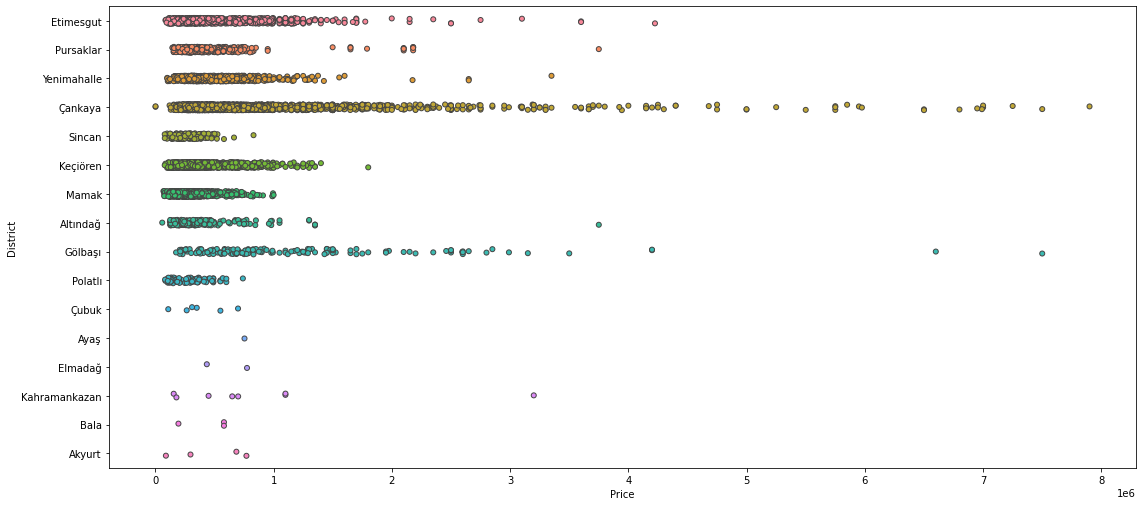

In [7]:
fig, ax = plt.subplots(figsize=[15,7])
plt.tight_layout() 
ax=sns.stripplot(x ="price", y ="district", jitter=True, linewidth=1, data=df)

plt.xlabel("Price")
plt.ylabel("District")
plt.show()

In [8]:
df["last_edit"]=df["last_edit"].str.replace("Bugün","0")
df["last_edit"]=df["last_edit"].str.replace("Dün","1")
df["last_edit"]=df["last_edit"].str.replace("Gün Önce","")
df["last_edit"]=df["last_edit"].astype(int)

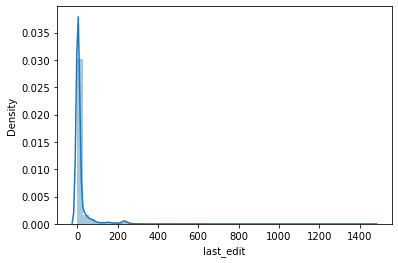

In [9]:
sns.distplot(df["last_edit"]);

In [10]:
df["number_of_rooms"]=df["number_of_rooms"].str.split("+",1)
df["number_of_rooms"]=df['number_of_rooms'].str[0].astype(int)+df['number_of_rooms'].str[1].astype(int)
df=df[df["number_of_rooms"]<11]

<AxesSubplot:>

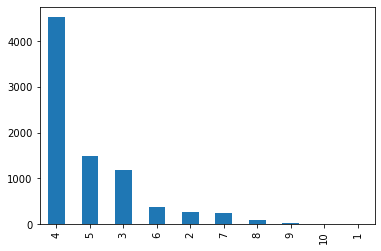

In [11]:
df["number_of_rooms"].value_counts().plot.bar()

In [12]:
df["area"]=df["area"].str.replace(" m2","").str.replace(",","")
df["area"]=df["area"].astype(int)
df=df[df['area']<1000]

<AxesSubplot:xlabel='area'>

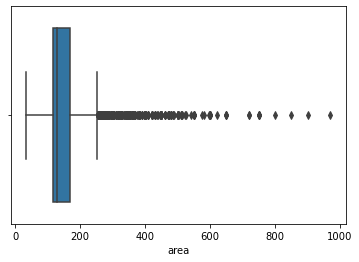

In [13]:
sns.boxplot(df['area'])

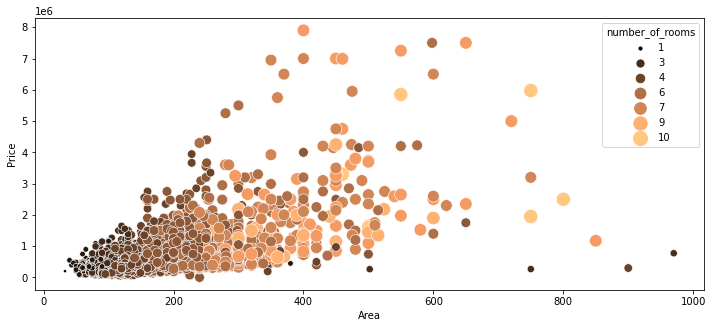

In [14]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="area", y="price",
                     hue="number_of_rooms", size ="number_of_rooms",
                     palette='copper', sizes=(10, 200),
                     data=df)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [15]:
df["prop_floor"]=df["prop_floor"].replace(["Giriş Katı","Bahçe Katı","None","Zemin","Bodrum ve Zemin","Yarı Bodrum","Villa Katı","Yüksek Giriş"],"0")
df["prop_floor"]=df["prop_floor"].str.replace("Katı","")
df["prop_floor"]=df["prop_floor"].str.replace(". Kat","")
df["prop_floor"]=df["prop_floor"].str.replace("Kot 3","-3")
df["prop_floor"]=df["prop_floor"].str.replace("Kot 2","-2")
df["prop_floor"]=df["prop_floor"].str.replace("Kot 1","-1")
df["prop_floor"]=df["prop_floor"].str.replace("En Üs","21")
df["prop_floor"]=df["prop_floor"].str.replace("Teras","21")
df["prop_floor"]=df["prop_floor"].str.replace("Çatı","21")
df["prop_floor"]=df["prop_floor"].str.replace("21 ve üzeri","21")
df["prop_floor"]=df["prop_floor"].str.replace("Ar","2")
df["prop_floor"]=df["prop_floor"].str.replace("Bodrum","-1")
df["prop_floor"]=df["prop_floor"].astype(int)

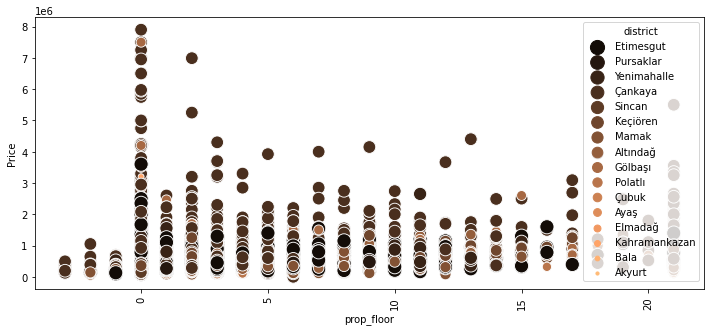

In [16]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="prop_floor", y="price",
                     hue="district", size ="district",
                     palette='copper', sizes=(10, 200),
                     data=df)
plt.xlabel("prop_floor")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

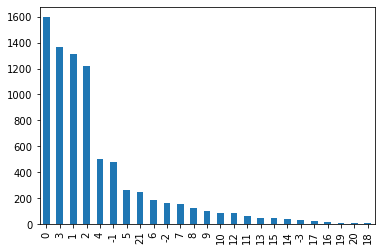

In [17]:
df["prop_floor"].value_counts().plot.bar()

In [18]:
df["building_age"]=df["building_age"].str.replace(" Yaşında","")
df["building_age"]=df["building_age"].str.replace("Sıfır Bina","0")
df["building_age"]=df["building_age"].astype(int)

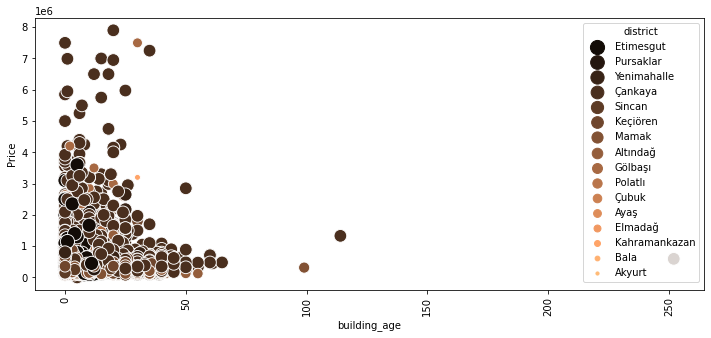

In [19]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="building_age", y="price",
                     hue="district", size ="district",
                     palette='copper', sizes=(10, 200),
                     data=df)
plt.xlabel("building_age")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

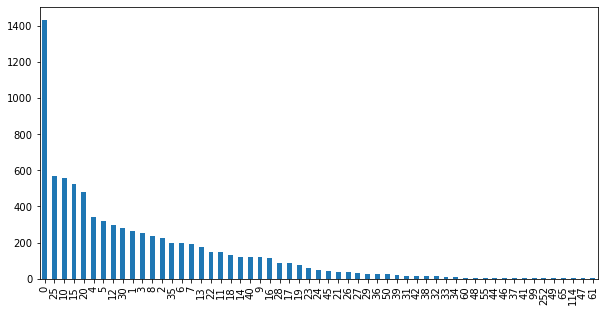

In [20]:
plt.figure(figsize=(10,5))
df["building_age"].value_counts().plot.bar()

In [21]:
df["heating_type"]=df["heating_type"].str.replace("Belirtilmemiş","Soba")
df["heating_type"]=df["heating_type"].str.replace("Isıtma Yok","Soba")
df["heating_type"]=df["heating_type"].str.replace("Kat Kaloriferi","Merkezi")

<AxesSubplot:>

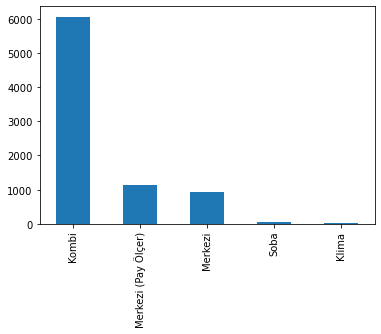

In [22]:
df.heating_type.value_counts().plot.bar()

In [23]:
df["building_floors"]=df["building_floors"].str.replace("Katlı","")
df["building_floors"]=df["building_floors"].replace("None","0")

<AxesSubplot:ylabel='building_floors'>

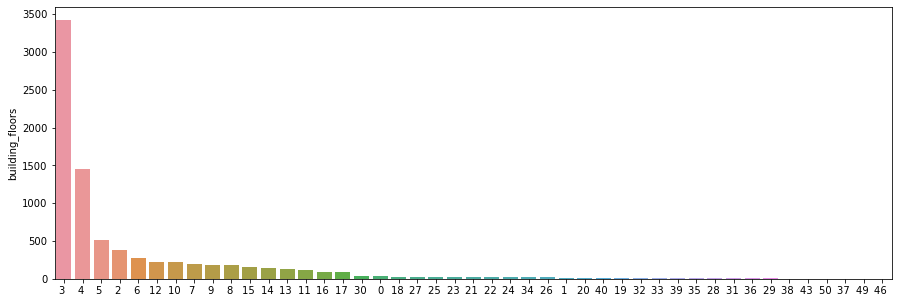

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.building_floors.value_counts().index,y=df.building_floors.value_counts())

In [25]:
df["credit_availability"]=df["credit_availability"].str.replace("Bilinmiyor","Uygun değil")
df["credit_availability"]=df["credit_availability"].str.replace("None","Uygun değil")
df["credit_availability"]=df["credit_availability"].str.replace("Uygun değil","0")
df["credit_availability"]=df["credit_availability"].str.replace("Uygun","1")

<AxesSubplot:>

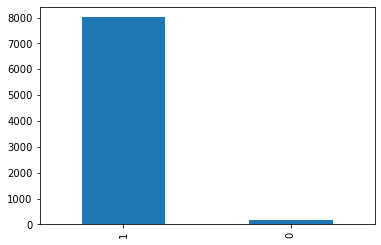

In [26]:
df["credit_availability"].value_counts().plot.bar()

In [27]:
df["furniture_availability"]=df["furniture_availability"].str.replace("Bilinmiyor","Eşyalı Değil")
df["furniture_availability"]=df["furniture_availability"].str.replace("None","Eşyalı Değil")

<AxesSubplot:>

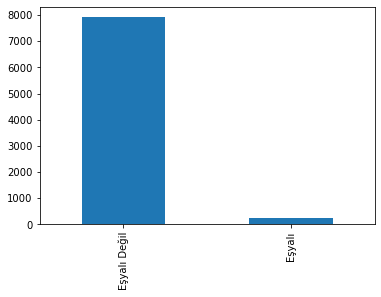

In [28]:
df.furniture_availability.value_counts().plot.bar()

In [29]:
df["bathrooms"]=df["bathrooms"].replace("None","1")
df["bathrooms"]=df["bathrooms"].astype(int)

<AxesSubplot:>

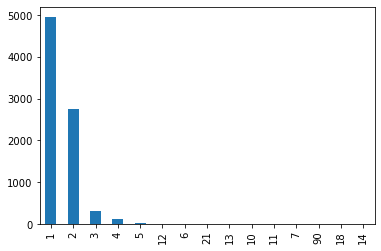

In [30]:
df.bathrooms.value_counts().plot.bar()

<AxesSubplot:>

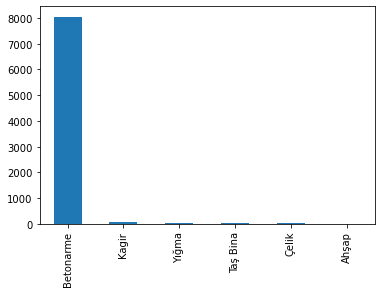

In [31]:
df["building_type"]=df["building_type"].replace("None","Betonarme")
df.building_type.value_counts().plot.bar()

<AxesSubplot:>

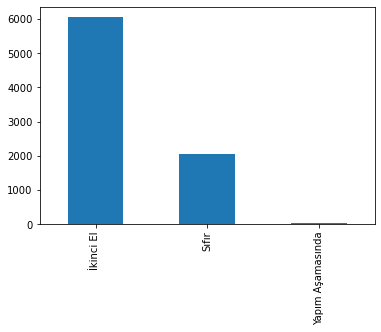

In [32]:
df["building_status"]=df["building_status"].replace("None","İkinci El")
df.building_status.value_counts().plot.bar()

<AxesSubplot:>

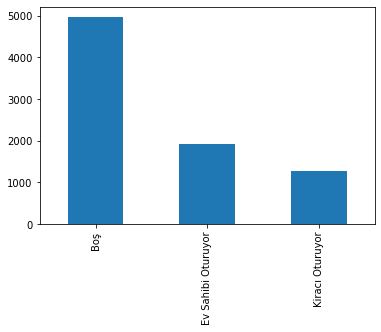

In [33]:
df["usage_status"]=df["usage_status"].replace("None","Boş")
df["usage_status"]=df["usage_status"].replace("Belirtilmemiş","Kiracı Oturuyor")
df.usage_status.value_counts().plot.bar()

<AxesSubplot:>

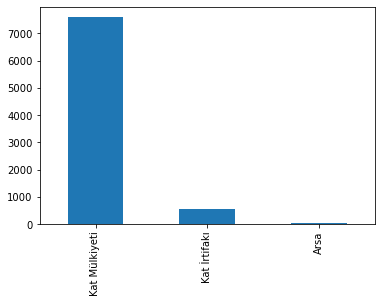

In [34]:
df["deed"]=df["deed"].replace("None","Kat Mülkiyeti")
df["deed"]=df["deed"].replace("Belirtilmemiş","Kat Mülkiyeti")
df.deed.value_counts().plot.bar()

In [35]:
df.dues.value_counts()
df["dues"]=df["dues"].str.replace("TL","")
df["dues"]=df["dues"].str.replace("None","0")
df["dues"]=df["dues"].str.replace(",","")
df["dues"]=df["dues"].astype(float)
df["dues"]=df["dues"].replace(0,df.dues.mean())

<AxesSubplot:ylabel='Frequency'>

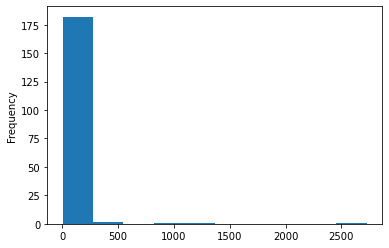

In [36]:
df.dues.value_counts().plot.hist()

<AxesSubplot:>

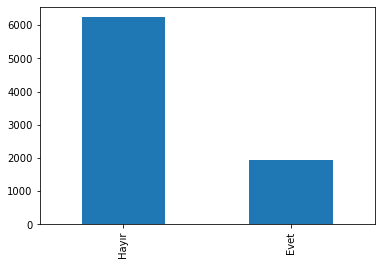

In [37]:
df.swap.value_counts()
df["swap"]=df["swap"].replace("None","Hayır")
df.swap.value_counts().plot.bar()

<AxesSubplot:>

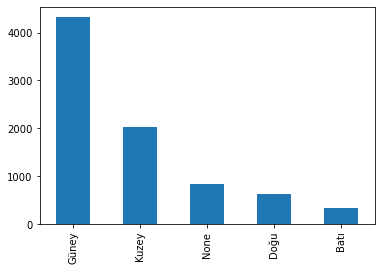

In [38]:
df["facade"]=df["facade"].str.replace(",","")
df.facade.value_counts().plot.bar()

<AxesSubplot:>

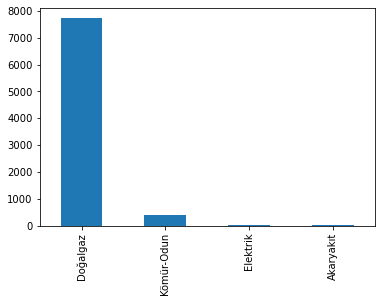

In [39]:
df["fuel_type"]=df["fuel_type"].replace("None","Kömür-Odun")
df.fuel_type.value_counts().plot.bar()

<AxesSubplot:>

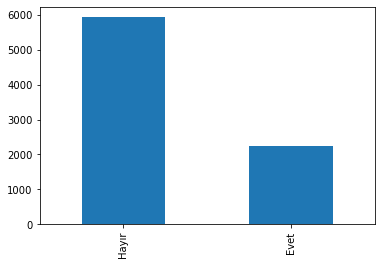

In [40]:
df["inside_the_site"]=df["inside_the_site"].replace("None","Hayır")
df["inside_the_site"]=df["inside_the_site"].replace(df[df["inside_the_site"]!="Hayır"]["inside_the_site"].values,"Evet")
df.inside_the_site.value_counts().plot.bar()

In [41]:
df['rental_income']=df['rental_income'].replace("None","1000")
df['rental_income']=df['rental_income'].str.replace(" TL","").str.replace(".","").str.replace(",","")
df['rental_income']=df['rental_income'].astype(int)
df=df[df['rental_income']<8000]

<AxesSubplot:xlabel='rental_income'>

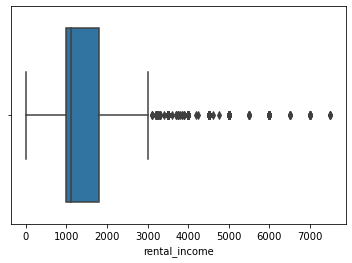

In [42]:
sns.boxplot(df['rental_income'])

### Veri temizleme işlemleri sonrasında son durum

In [43]:
df.sample(3)

,listing_id,price,city,district,neighborhood,last_edit,listing_status,housing_type,number_of_rooms,area,...,building_status,usage_status,deed,dues,swap,facade,fuel_type,inside_the_site,rental_income,title
7611,16354-20953,765000.0,Ankara,Yenimahalle,Pamuklar,12,Satılık,Daire,5,195,...,İkinci El,Boş,Kat Mülkiyeti,88.460465,Evet,Kuzey,Doğalgaz,Evet,1000,ÖZKARDEŞLER'DEN BÖLGESİNİN EN İDDİALI SİTESİND...
3838,39672-9122,690000.0,Ankara,Keçiören,Ayvalı,6,Satılık,Daire,5,200,...,Sıfır,Boş,Kat Mülkiyeti,50.000000,Evet,None,Doğalgaz,Hayır,1000,KARDEŞLER'DE 4+1 AÇIK TERASLI MANZARALI ASANSÖ...
6495,117517-46,880000.0,Ankara,Etimesgut,Bağlıca,5,Satılık,Daire,5,160,...,Sıfır,Boş,Kat Mülkiyeti,100.000000,Hayır,Güney,Doğalgaz,Evet,2500,BAĞLICADA SIFIR 4+1 KATTA SATILIK DAİRELER


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 8215
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              8112 non-null   object 
 1   price                   8112 non-null   float64
 2   city                    8112 non-null   object 
 3   district                8112 non-null   object 
 4   neighborhood            8112 non-null   object 
 5   last_edit               8112 non-null   int32  
 6   listing_status          8112 non-null   object 
 7   housing_type            8112 non-null   object 
 8   number_of_rooms         8112 non-null   int32  
 9   area                    8112 non-null   int32  
 10  prop_floor              8112 non-null   int32  
 11  building_age            8112 non-null   int32  
 12  heating_type            8112 non-null   object 
 13  building_floors         8112 non-null   object 
 14  credit_availability     8103 non-null   

In [45]:
df.corr()

,price,last_edit,number_of_rooms,area,prop_floor,building_age,bathrooms,dues,rental_income
price,1.000000,0.022876,0.499830,0.638275,0.209799,-0.195621,0.303258,0.349733,0.464121
last_edit,0.022876,1.000000,0.026052,0.028151,0.026446,0.034246,0.002390,0.007893,-0.011600
number_of_rooms,0.499830,0.026052,1.000000,0.815848,0.168536,-0.166129,0.324044,0.084890,0.276679
area,0.638275,0.028151,0.815848,1.000000,0.196954,-0.211002,0.347811,0.154623,0.335342
prop_floor,0.209799,0.026446,0.168536,0.196954,1.000000,-0.168806,0.110234,0.161725,0.177758
building_age,-0.195621,0.034246,-0.166129,-0.211002,-0.168806,1.000000,-0.185997,0.043311,-0.110025
bathrooms,0.303258,0.002390,0.324044,0.347811,0.110234,-0.185997,1.000000,0.082597,0.180790
dues,0.349733,0.007893,0.084890,0.154623,0.161725,0.043311,0.082597,1.000000,0.319515
rental_income,0.464121,-0.011600,0.276679,0.335342,0.177758,-0.110025,0.180790,0.319515,1.000000


In [46]:
df.describe()

,price,last_edit,number_of_rooms,area,prop_floor,building_age,bathrooms,dues,rental_income
count,8.112000e+03,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000
mean,5.157717e+05,17.202293,4.198102,150.980276,3.032298,12.873767,1.493836,115.958079,1524.915064
std,4.640161e+05,50.224056,1.047783,66.959987,4.514440,11.717290,1.312464,141.503351,901.878991
min,1.270000e+03,0.000000,1.000000,33.000000,-3.000000,0.000000,1.000000,1.000000,1.000000
25%,2.690000e+05,2.000000,4.000000,115.000000,0.000000,3.000000,1.000000,50.000000,1000.000000
50%,3.890000e+05,4.000000,4.000000,130.000000,2.000000,10.000000,1.000000,88.460465,1100.000000
75%,6.150000e+05,7.000000,5.000000,170.000000,3.000000,20.000000,2.000000,100.000000,1800.000000
max,7.900000e+06,1458.000000,10.000000,970.000000,21.000000,252.000000,90.000000,4000.000000,7500.000000


In [47]:
df.shape

(8112, 28)

<AxesSubplot:>

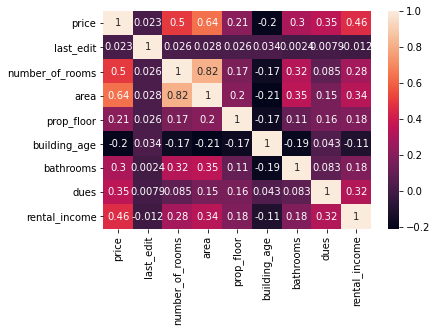

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
x,y=df.drop(["price","title","listing_id"],axis=1),df[["price"]] 
x=pd.get_dummies(x,drop_first=True)

In [50]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [51]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,7.853607e-01,2.162976e+05,1.113832e+05
Ridge,7.219749e-01,2.461722e+05,1.287302e+05
Lasso,7.077848e-01,2.523762e+05,1.319480e+05
KNeighborsRegressor,6.530559e-01,2.749962e+05,1.264358e+05
ElasticNet,5.936035e-01,2.976268e+05,1.505053e+05
ExtraTreeRegressor,4.392480e-01,3.496089e+05,1.217095e+05
LinearRegression,-3.957804e+11,2.937137e+11,1.223888e+10


## Deep Learning Uygulanırsa?

In [52]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [55]:
x=scaler.fit_transform(x)

In [56]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.000000,0.444444,0.178228,0.333333,0.011905,0.011236,0.021871,0.399920,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.444444,0.178228,0.458333,0.000000,0.011236,0.021871,0.399920,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.444444,0.167556,0.250000,0.003968,0.011236,0.062266,0.433258,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.333333,0.098186,0.166667,0.039683,0.000000,0.021871,0.133218,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.000000,0.333333,0.130203,0.166667,0.031746,0.011236,0.082271,0.333244,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,0.037037,0.333333,0.092850,0.125000,0.000000,0.011236,0.021871,0.199893,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8108,0.008230,0.333333,0.092850,0.208333,0.119048,0.000000,0.007252,0.133218,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8109,0.045953,0.444444,0.210245,0.166667,0.059524,0.000000,0.049762,0.133218,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8110,0.017833,0.333333,0.092850,0.208333,0.099206,0.000000,0.012253,0.159888,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [57]:
x.shape,y.shape

((8112, 460), (8112, 1))

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [59]:
model=Sequential()
model.add(Dense(440, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(380, activation='relu'))
model.add(Dense(340, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(220, activation='relu'))
model.add(Dense(198, activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [60]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=450, verbose=1)

Epoch 1/450
51/51 [==============================] - 2s 31ms/step - loss: 469794826712.6154 - val_loss: 171415732224.0000
Epoch 2/450
51/51 [==============================] - 1s 10ms/step - loss: 129827637563.0769 - val_loss: 112412213248.0000
Epoch 3/450
51/51 [==============================] - 0s 10ms/step - loss: 104166643712.0000 - val_loss: 71635582976.0000
Epoch 4/450
51/51 [==============================] - 1s 11ms/step - loss: 73811885764.9231 - val_loss: 78333861888.0000
Epoch 5/450
51/51 [==============================] - 1s 10ms/step - loss: 56459961028.9231 - val_loss: 70639386624.0000
Epoch 6/450
51/51 [==============================] - 0s 10ms/step - loss: 44256310311.3846 - val_loss: 78335213568.0000
Epoch 7/450
51/51 [==============================] - 1s 10ms/step - loss: 51727979283.6923 - val_loss: 57143005184.0000
Epoch 8/450
51/51 [==============================] - 1s 10ms/step - loss: 40437676819.6923 - val_loss: 61242535936.0000
Epoch 9/450
51/51 [================

51/51 [==============================] - 1s 11ms/step - loss: 7355534227.6923 - val_loss: 47694512128.0000
Epoch 70/450
51/51 [==============================] - 1s 12ms/step - loss: 5226968305.2308 - val_loss: 45027618816.0000
Epoch 71/450
51/51 [==============================] - 1s 11ms/step - loss: 2943997474.4615 - val_loss: 48247369728.0000
Epoch 72/450
51/51 [==============================] - 1s 11ms/step - loss: 2260847739.0769 - val_loss: 46056144896.0000
Epoch 73/450
51/51 [==============================] - 1s 11ms/step - loss: 3151168669.5385 - val_loss: 47048003584.0000
Epoch 74/450
51/51 [==============================] - 1s 11ms/step - loss: 1937872150.1538 - val_loss: 47663058944.0000
Epoch 75/450
51/51 [==============================] - 1s 12ms/step - loss: 1788286503.3846 - val_loss: 47236251648.0000
Epoch 76/450
51/51 [==============================] - 1s 12ms/step - loss: 1843452726.1538 - val_loss: 48899305472.0000
Epoch 77/450
51/51 [==============================] -

51/51 [==============================] - 1s 12ms/step - loss: 3062531716.9231 - val_loss: 44072722432.0000
Epoch 138/450
51/51 [==============================] - 1s 11ms/step - loss: 2485134518.1538 - val_loss: 44919713792.0000
Epoch 139/450
51/51 [==============================] - 1s 12ms/step - loss: 2192836627.6923 - val_loss: 44804935680.0000
Epoch 140/450
51/51 [==============================] - 1s 12ms/step - loss: 1720155864.6154 - val_loss: 42962132992.0000
Epoch 141/450
51/51 [==============================] - 1s 12ms/step - loss: 2142270230.1538 - val_loss: 46446161920.0000
Epoch 142/450
51/51 [==============================] - 1s 11ms/step - loss: 2985669499.0769 - val_loss: 45724782592.0000
Epoch 143/450
51/51 [==============================] - 1s 11ms/step - loss: 2733242582.1538 - val_loss: 43225288704.0000
Epoch 144/450
51/51 [==============================] - 1s 11ms/step - loss: 2100728989.5385 - val_loss: 44087705600.0000
Epoch 145/450
51/51 [=========================

Epoch 205/450
51/51 [==============================] - 1s 12ms/step - loss: 1748081469.5385 - val_loss: 40575217664.0000
Epoch 206/450
51/51 [==============================] - 1s 13ms/step - loss: 1072017078.1538 - val_loss: 42465419264.0000
Epoch 207/450
51/51 [==============================] - 1s 12ms/step - loss: 1755783376.0000 - val_loss: 42874748928.0000
Epoch 208/450
51/51 [==============================] - 1s 13ms/step - loss: 2122421595.0769 - val_loss: 40716414976.0000
Epoch 209/450
51/51 [==============================] - 1s 13ms/step - loss: 1245745212.3077 - val_loss: 42946478080.0000
Epoch 210/450
51/51 [==============================] - 1s 13ms/step - loss: 936164265.8462 - val_loss: 43586457600.0000
Epoch 211/450
51/51 [==============================] - 1s 12ms/step - loss: 1047092598.1538 - val_loss: 44222238720.0000
Epoch 212/450
51/51 [==============================] - 1s 12ms/step - loss: 1149340174.7692 - val_loss: 41890107392.0000
Epoch 213/450
51/51 [============

Epoch 273/450
51/51 [==============================] - 1s 12ms/step - loss: 4190580925.5385 - val_loss: 46393823232.0000
Epoch 274/450
51/51 [==============================] - 1s 11ms/step - loss: 2353352238.7692 - val_loss: 42860806144.0000
Epoch 275/450
51/51 [==============================] - 1s 12ms/step - loss: 1326515360.0000 - val_loss: 42121170944.0000
Epoch 276/450
51/51 [==============================] - 1s 12ms/step - loss: 722971964.3077 - val_loss: 41164345344.0000
Epoch 277/450
51/51 [==============================] - 1s 12ms/step - loss: 700564533.5385 - val_loss: 41069121536.0000
Epoch 278/450
51/51 [==============================] - 1s 13ms/step - loss: 701536651.0769 - val_loss: 40263921664.0000
Epoch 279/450
51/51 [==============================] - 1s 13ms/step - loss: 780949878.1538 - val_loss: 43135385600.0000
Epoch 280/450
51/51 [==============================] - 1s 12ms/step - loss: 1612112406.1538 - val_loss: 41144705024.0000
Epoch 281/450
51/51 [===============

Epoch 341/450
51/51 [==============================] - 1s 12ms/step - loss: 3254575613.5385 - val_loss: 42623430656.0000
Epoch 342/450
51/51 [==============================] - 1s 12ms/step - loss: 1083003518.1538 - val_loss: 41776615424.0000
Epoch 343/450
51/51 [==============================] - 1s 12ms/step - loss: 894796806.1538 - val_loss: 39790727168.0000
Epoch 344/450
51/51 [==============================] - 1s 12ms/step - loss: 568422376.0000 - val_loss: 41341169664.0000
Epoch 345/450
51/51 [==============================] - 1s 12ms/step - loss: 501500846.1538 - val_loss: 40241668096.0000
Epoch 346/450
51/51 [==============================] - 1s 12ms/step - loss: 466505504.6154 - val_loss: 40035487744.0000
Epoch 347/450
51/51 [==============================] - 1s 12ms/step - loss: 647462194.4615 - val_loss: 40842092544.0000
Epoch 348/450
51/51 [==============================] - 1s 12ms/step - loss: 811119094.1538 - val_loss: 40059498496.0000
Epoch 349/450
51/51 [=================

Epoch 409/450
51/51 [==============================] - 1s 14ms/step - loss: 848236898.4615 - val_loss: 40915996672.0000
Epoch 410/450
51/51 [==============================] - 1s 12ms/step - loss: 582135720.6154 - val_loss: 41229127680.0000
Epoch 411/450
51/51 [==============================] - 1s 12ms/step - loss: 501830062.7692 - val_loss: 40212996096.0000
Epoch 412/450
51/51 [==============================] - 1s 12ms/step - loss: 397216756.9231 - val_loss: 40083484672.0000
Epoch 413/450
51/51 [==============================] - 1s 11ms/step - loss: 353138074.4615 - val_loss: 40234926080.0000
Epoch 414/450
51/51 [==============================] - 1s 12ms/step - loss: 558013037.5385 - val_loss: 40915832832.0000
Epoch 415/450
51/51 [==============================] - 1s 13ms/step - loss: 806351970.4615 - val_loss: 40330395648.0000
Epoch 416/450
51/51 [==============================] - 1s 13ms/step - loss: 1076307872.0000 - val_loss: 43432632320.0000
Epoch 417/450
51/51 [==================

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 440)               202840    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               176400    
_________________________________________________________________
dense_2 (Dense)              (None, 380)               152380    
_________________________________________________________________
dense_3 (Dense)              (None, 340)               129540    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               102300    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               75250     
_________________________________________________________________
dense_6 (Dense)              (None, 220)               5

<AxesSubplot:>

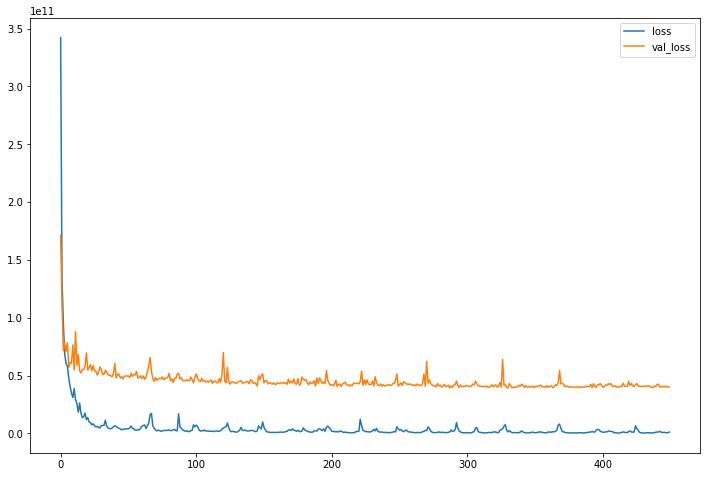

In [62]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [63]:
pred=model.predict(x_test)

In [64]:
(mean_squared_error(y_test,pred))**.5

200359.6000920299

In [65]:
r2_score(y_test,pred) 

0.8158268679757772

## İlan başlığında en çok kullanılan kelimeler ne diye bakılırsa?

In [66]:
df["title"]=df["title"].str.lower()
df["title"]=df["title"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırı
df["title"]=df["title"].str.replace("\d+","") #d digit rakamları kaldır
df["title"]=df["title"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r


In [67]:
df.title

0       bağlıca satılık  kapalı otopark yüzme havuzu  ...
1       bağlıca satılık  ara katta daire seçenekleri e...
2       emlak küpünde merkezde cadde üzerinde süper lü...
3       ertekin emlaktan pazartesi pazari yak güney ce...
4       emlak gezgini acil eşyali satilik süperlüx  ar...
                              ...                        
8211    merkezin en yeni binasinda  ebeveyn banyolu so...
8212    dikmen sinan cad paraleli satilik manzarali  d...
8213           hilal mahsok   net  m ara kat harika daire
8214     dikmen şeftalide katön cephekombilisatilik daire
8215       fiyat düştüüeryaman susuzda satilik ultra lüx 
Name: title, Length: 8112, dtype: object

In [68]:
from wordcloud import WordCloud
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

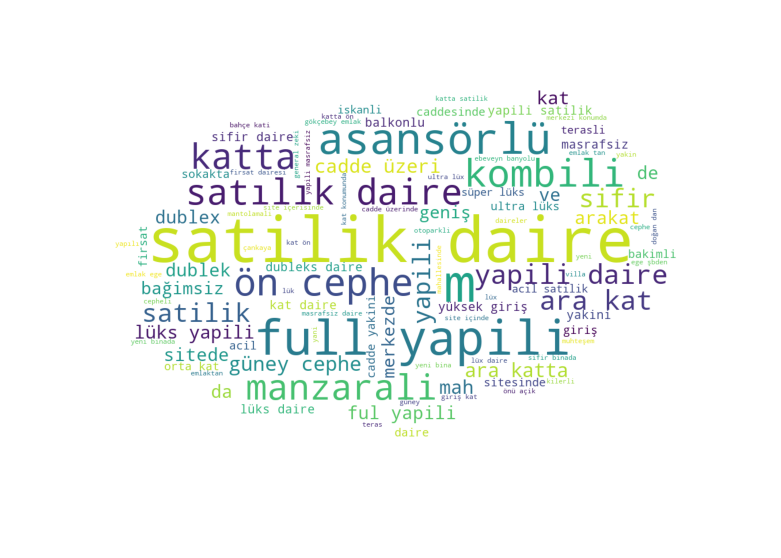

In [69]:
wc(df["title"],'white')